------------------import package

In [1]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM , RNN , SimpleRNN
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline 

2023-02-04 18:25:47.466806: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 18:25:47.466837: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 18:25:48.611140: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-04 18:25:48.611247: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-04 18:25:48.611264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
num_words = 10000
max_review_len = 250

In [3]:
train = pd.read_csv('/home/mit34/Documents/sa_v3/db_02/train.csv', 
                    header=None, 
                    names=['Review', 'Class'],)

In [4]:
train

,Review,Class
0,досудебное расследование по факту покупки енпф...,0
1,infokz января портал центразия со ссылкой...,0
2,трлн тенге пенсионных накоплений казахстанцев...,1
3,южноказахстанская мукомольная компания увеличи...,1
4,тэц не является причиной смога в астане всему ...,1
...,...,...
6605,проект аутизм победим выходит на республиканск...,1
6606,задержан эксминистр национальной экономики куа...,0
6607,бумаги kazminerals подорожали на казахстанской...,0
6608,прессслужба мангистауского областного суда ав...,0


In [5]:
reviews = train['Review']

In [6]:
train['Class'].fillna(0, inplace=True)
train['Class'] = train['Class'].astype(int)

In [7]:
y_train = train['Class'].astype(int)

In [8]:
y_train

0       0
1       0
2       1
3       1
4       1
       ..
6605    1
6606    0
6607    0
6608    0
6609    1
Name: Class, Length: 6610, dtype: int64

In [9]:
train

,Review,Class
0,досудебное расследование по факту покупки енпф...,0
1,infokz января портал центразия со ссылкой...,0
2,трлн тенге пенсионных накоплений казахстанцев...,1
3,южноказахстанская мукомольная компания увеличи...,1
4,тэц не является причиной смога в астане всему ...,1
...,...,...
6605,проект аутизм победим выходит на республиканск...,1
6606,задержан эксминистр национальной экономики куа...,0
6607,бумаги kazminerals подорожали на казахстанской...,0
6608,прессслужба мангистауского областного суда ав...,0


In [10]:
tokenizer = Tokenizer(num_words=num_words)

In [11]:

reviews = [review for review in reviews if isinstance(review, str)]
tokenizer.fit_on_texts(reviews)


In [12]:
tokenizer.word_index

{'в': 1,
 'и': 2,
 'на': 3,
 'по': 4,
 'с': 5,
 'что': 6,
 'не': 7,
 'года': 8,
 'для': 9,
 'за': 10,
 'к': 11,
 'тенге': 12,
 'а': 13,
 'из': 14,
 'о': 15,
 'это': 16,
 'как': 17,
 'до': 18,
 'от': 19,
 'году': 20,
 'также': 21,
 'казахстана': 22,
 'мы': 23,
 'ао': 24,
 'казахстан': 25,
 'рк': 26,
 'при': 27,
 'будет': 28,
 'но': 29,
 'все': 30,
 'он': 31,
 'области': 32,
 'его': 33,
 'млрд': 34,
 'у': 35,
 'этом': 36,
 'республики': 37,
 'то': 38,
 'более': 39,
 'развития': 40,
 'лет': 41,
 'так': 42,
 'их': 43,
 'или': 44,
 'было': 45,
 'уже': 46,
 'время': 47,
 'том': 48,
 'которые': 49,
 'я': 50,
 'был': 51,
 'год': 52,
 'алматы': 53,
 'только': 54,
 'есть': 55,
 'же': 56,
 'казахстане': 57,
 'компании': 58,
 'страны': 59,
 'банка': 60,
 'если': 61,
 'млн': 62,
 'экономики': 63,
 'были': 64,
 'со': 65,
 'будут': 66,
 'тоо': 67,
 'того': 68,
 'является': 69,
 'енпф': 70,
 'рамках': 71,
 'об': 72,
 'еще': 73,
 'назад': 74,
 'государства': 75,
 'они': 76,
 'банк': 77,
 'сегодня': 78,

In [13]:
sequences = tokenizer.texts_to_sequences(reviews)

In [14]:
index = 1
print(reviews[index])
print(sequences[index])

infokz  января     портал центразия со ссылкой на свои источники в астане сообщил об аресте бывшего заместителя руководителя администрации президента баглана майлыбаева сообщает инфоkz   официального подтверждения этой информации нет   в статье портала центразия даны несколько версий причины ареста причиной могут быть с хищения  млрд тенге выделенных на политические и исторические исследования по другой версии арест майлыбаева связан с делом в рамках которого арестован эксминистр куандык бишимбаев  хищения в холдинге байтерек   на днях президент освободил баглана майлыбаева от должности заместителя руководителя своей администрации давайте вспомним чем известен баглан асаубаевич и какие должности он занимал   биография   баглан асаубаевич майлыбаев появился на свет в джамбуле ныне тараз  мая  года по первой специальности он журналист окончил в  году альмаматер большинства казахстанских тружеников пера и микрофона  казгу имени альфараби   спустя два года он получил второе образование в р

In [70]:
tokenizer.word_index['убить']

55835

In [16]:
x_train = pad_sequences(sequences, maxlen=max_review_len)

In [17]:
x_train[:5]

array([[   0,    0,    0, ...,    2, 1310, 1577],
       [2514, 4980,  132, ...,  311, 2579, 5216],
       [   0,    0,    0, ..., 2066, 4603,   79],
       [   0,    0,    0, ...,  428,  311, 4981],
       [   3, 1196, 2259, ...,    2, 1310, 1577]], dtype=int32)

In [18]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_review_len))
model.add(GRU(8))
model.add(Dense(1, activation='sigmoid'))

2023-02-04 18:26:06.160742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 18:26:06.161071: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 18:26:06.161180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-04 18:26:06.161271: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-04 18:26:06.161359: W tensorflow/c

In [19]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [20]:
model_save_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [21]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

Epoch 1/10
47/47 [==============================] - ETA: 0s - loss: 0.6095 - accuracy: 0.8099
Epoch 1: val_accuracy improved from -inf to 0.81694, saving model to best_model.h5
47/47 [==============================] - 10s 136ms/step - loss: 0.6095 - accuracy: 0.8099 - val_loss: 0.5120 - val_accuracy: 0.8169
Epoch 2/10
47/47 [==============================] - ETA: 0s - loss: 0.4371 - accuracy: 0.8269
Epoch 2: val_accuracy did not improve from 0.81694
47/47 [==============================] - 5s 117ms/step - loss: 0.4371 - accuracy: 0.8269 - val_loss: 0.4399 - val_accuracy: 0.8169
Epoch 3/10
47/47 [==============================] - ETA: 0s - loss: 0.3678 - accuracy: 0.8405
Epoch 3: val_accuracy improved from 0.81694 to 0.83661, saving model to best_model.h5
47/47 [==============================] - 6s 118ms/step - loss: 0.3678 - accuracy: 0.8405 - val_loss: 0.4069 - val_accuracy: 0.8366
Epoch 4/10
47/47 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.8874
Epoch 4: v

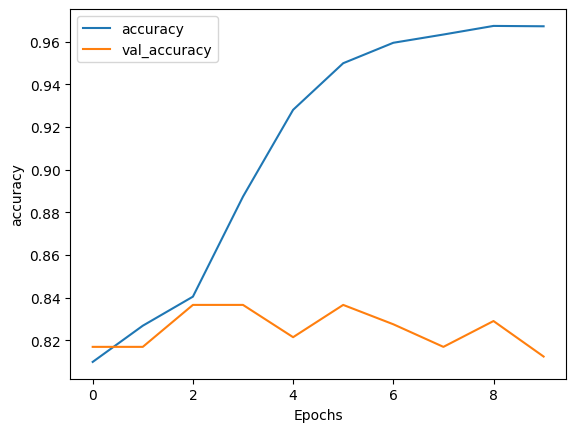

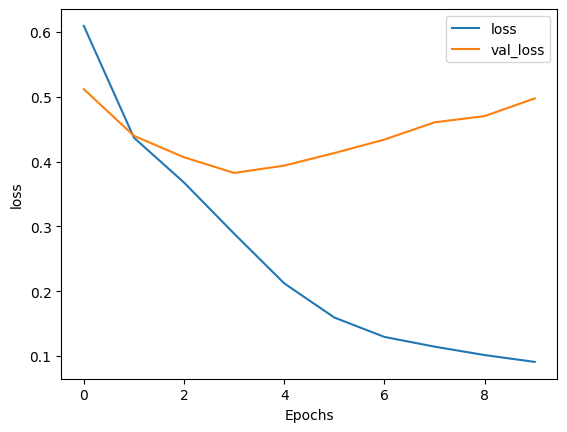

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

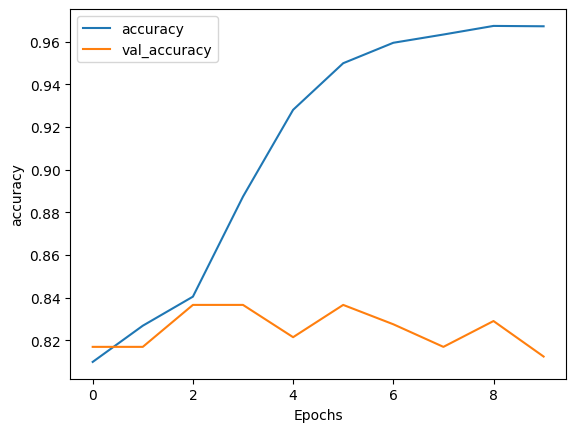

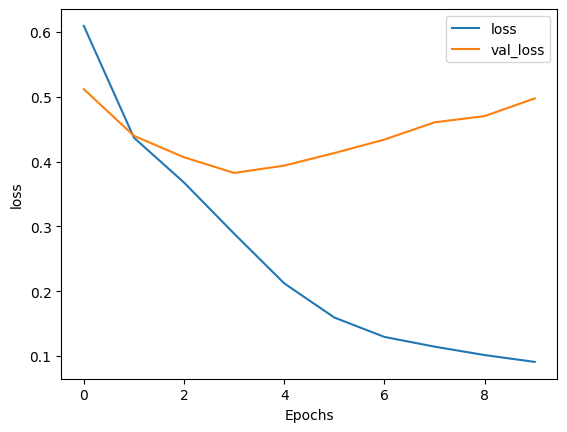

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
model.load_weights(model_save_path)

In [28]:
test = pd.read_csv('/home/mit34/Documents/sa_v3/db_02/test.csv', 
                    header=None, 
                    names=['Review', 'Class'],)

In [30]:
test

,Review,Class
0,досудебное расследование по факту покупки енпф...,0
1,в атырау члены совета деловых женщин взяли под...,1
2,тараз казинформ рост промышленного производст...,1
3,алматы апреля казтаг в алматы участились слу...,0
4,в алматы в преддверии универсиады появится нов...,1
...,...,...
1649,астана казинформ казинформ предлагает читател...,1
1650,современные технология нам помогут казахстан п...,1
1651,как сообщает rankingkz совокупный кредитный по...,1
1652,план нации конкретных шагов активно реализует...,1


In [31]:
test_sequences = tokenizer.texts_to_sequences(test['Review'])

In [32]:
x_test = pad_sequences(test_sequences, maxlen=max_review_len)

In [33]:
x_test[:5]

array([[   0,    0,    0, ...,    2, 1310, 1577],
       [   0,    0,    0, ..., 1774,  461, 5351],
       [   0,    0,    0, ..., 9524,    2, 2856],
       [   0,    0,    0, ...,    1, 3328, 1006],
       [   0,    0,    0, ...,    2, 1310, 1577]], dtype=int32)

In [34]:
y_test = test['Class']

In [35]:
scores = model.evaluate(x_test, y_test, verbose=1)

52/52 [==============================] - 1s 21ms/step - loss: 0.3926 - accuracy: 0.8434


In [36]:
scores

[0.39264318346977234, 0.8434098958969116]

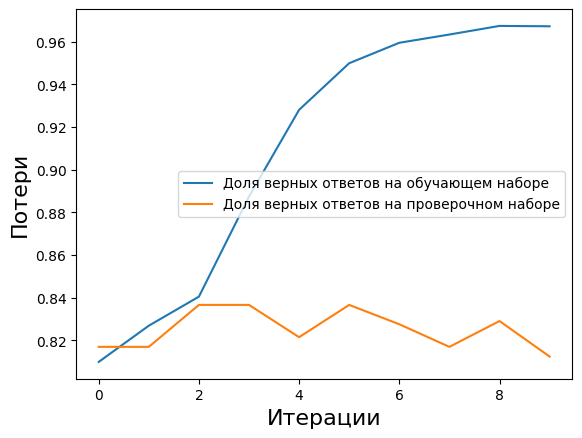

In [37]:

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Итерации',  fontsize=16)
plt.ylabel('Потери',  fontsize=16)
plt.legend()
plt.show()

In [68]:
text = 'убить'

In [66]:
sequence = tokenizer.texts_to_sequences([text])

In [67]:
sequence

[[]]

In [60]:
data = pad_sequences(sequence, maxlen=max_review_len)

In [61]:
data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [62]:
result = model.predict(data)

1/1 [==============================] - 0s 41ms/step


In [63]:
result

array([[0.40681693]], dtype=float32)

In [64]:
if result[[0]] < 0.5:
    print('Отзыв отрицательный')
else:
    print('Отзыв положительный')


Отзыв отрицательный
